<a href="https://colab.research.google.com/github/MohrezSheikh/PyTorchCourse/blob/master/PyTorchCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

**Tensors**

In [ ]:
x = torch.rand(4, 2, 3)
print(x)

tensor([[[0.2131, 0.0377, 0.3657],
         [0.4613, 0.4995, 0.5428]],

        [[0.1894, 0.1712, 0.7687],
         [0.6153, 0.5551, 0.1589]],

        [[0.4592, 0.2204, 0.7151],
         [0.1834, 0.8511, 0.8132]],

        [[0.8076, 0.2990, 0.0660],
         [0.0870, 0.7045, 0.5991]]])


In [ ]:
y = torch.empty(4, 2, 3)
print(y)

tensor([[[2.4775e-35, 0.0000e+00, 7.0065e-44],
         [7.0065e-44, 6.3058e-44, 6.7262e-44]],

        [[7.4269e-44, 6.3058e-44, 7.0065e-44],
         [7.8473e-44, 1.1771e-43, 6.7262e-44]],

        [[7.9874e-44, 8.1275e-44, 7.0065e-44],
         [6.8664e-44, 8.1275e-44, 7.0065e-44]],

        [[7.8473e-44, 6.4460e-44, 6.8664e-44],
         [7.2868e-44, 6.7262e-44, 6.8664e-44]]])


In [ ]:
z = torch.ones(4, 2, 3)
print(z)

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])


In [ ]:
h = torch.ones(2, 2, dtype=torch.int)
print(h)

tensor([[1, 1],
        [1, 1]], dtype=torch.int32)


In [ ]:
k = torch.tensor([2.5, 0.1])
print(k)

tensor([2.5000, 0.1000])


In [ ]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

print(x)
print(y)

tensor([[0.5031, 0.2126],
        [0.0022, 0.1278]])
tensor([[0.1585, 0.7199],
        [0.0700, 0.5606]])


In [ ]:
z = x + y
z = torch.add(x, y)
print(z)

tensor([[0.6617, 0.9325],
        [0.0723, 0.6884]])


In [ ]:
y.add_(x)
print(y)

tensor([[0.6617, 0.9325],
        [0.0723, 0.6884]])


In [ ]:
x = torch.rand(5, 3)

print(x)
print(x[:, 0])
print(x[1, :])
print(x[1, 1])
print('---------')
y = x.view(15)
print(y)

tensor([[0.7282, 0.3091, 0.7265],
        [0.2932, 0.0989, 0.1691],
        [0.0274, 0.5730, 0.5566],
        [0.7053, 0.7387, 0.9860],
        [0.0691, 0.7124, 0.3935]])
tensor([0.7282, 0.2932, 0.0274, 0.7053, 0.0691])
tensor([0.2932, 0.0989, 0.1691])
tensor(0.0989)
---------
tensor([0.7282, 0.3091, 0.7265, 0.2932, 0.0989, 0.1691, 0.0274, 0.5730, 0.5566,
        0.7053, 0.7387, 0.9860, 0.0691, 0.7124, 0.3935])


In [ ]:
x = torch.rand(4, 4)
print(x)

y = x.view(-1, 8)
print(y)
print(y.size())

tensor([[0.1567, 0.1108, 0.2600, 0.3513],
        [0.1809, 0.6013, 0.0370, 0.1736],
        [0.5995, 0.1538, 0.5284, 0.7546],
        [0.1427, 0.4811, 0.4789, 0.4493]])
tensor([[0.1567, 0.1108, 0.2600, 0.3513, 0.1809, 0.6013, 0.0370, 0.1736],
        [0.5995, 0.1538, 0.5284, 0.7546, 0.1427, 0.4811, 0.4789, 0.4493]])
torch.Size([2, 8])


In [ ]:
a = torch.ones(5)
print(a)
print('-------')
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
-------
[1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
a = np.ones(5)
print(a)

b = torch.from_numpy(a)
print(b)


a += 1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


**Calculate Gradients**

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)

y = x + 2
print(y)
 
z = y*y*2
z = z.mean()
print(z)

z.backward() # dz/dx
print(x.grad)


# how we can stop PyTorch from creating this gradient functions!:

x.requires_grad_(False)
print(x)

y = x.detach()
print(y)

with torch.no_grad():
  y = x + 2
  print(y)

tensor([ 0.0098, -0.1940, -0.1590], requires_grad=True)
tensor([2.0098, 1.8060, 1.8410], grad_fn=<AddBackward0>)
tensor(7.1269, grad_fn=<MeanBackward0>)
tensor([2.6797, 2.4080, 2.4547])
tensor([ 0.0098, -0.1940, -0.1590])
tensor([ 0.0098, -0.1940, -0.1590])
tensor([2.0098, 1.8060, 1.8410])


In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_()



tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


**Backpropagation**

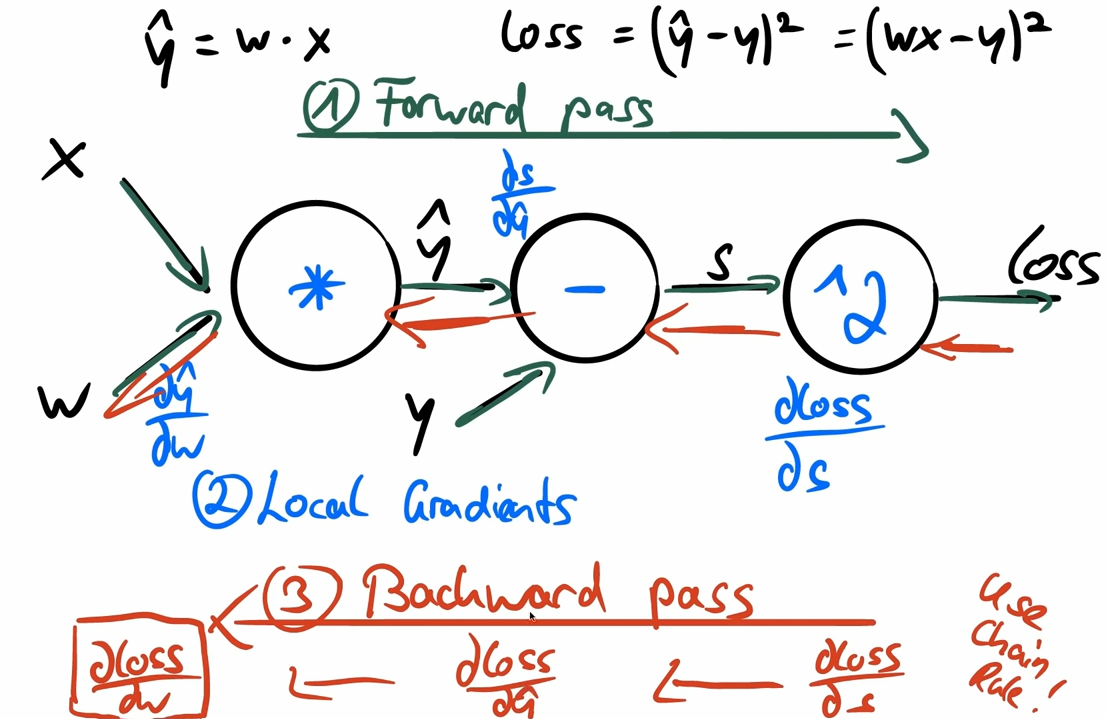

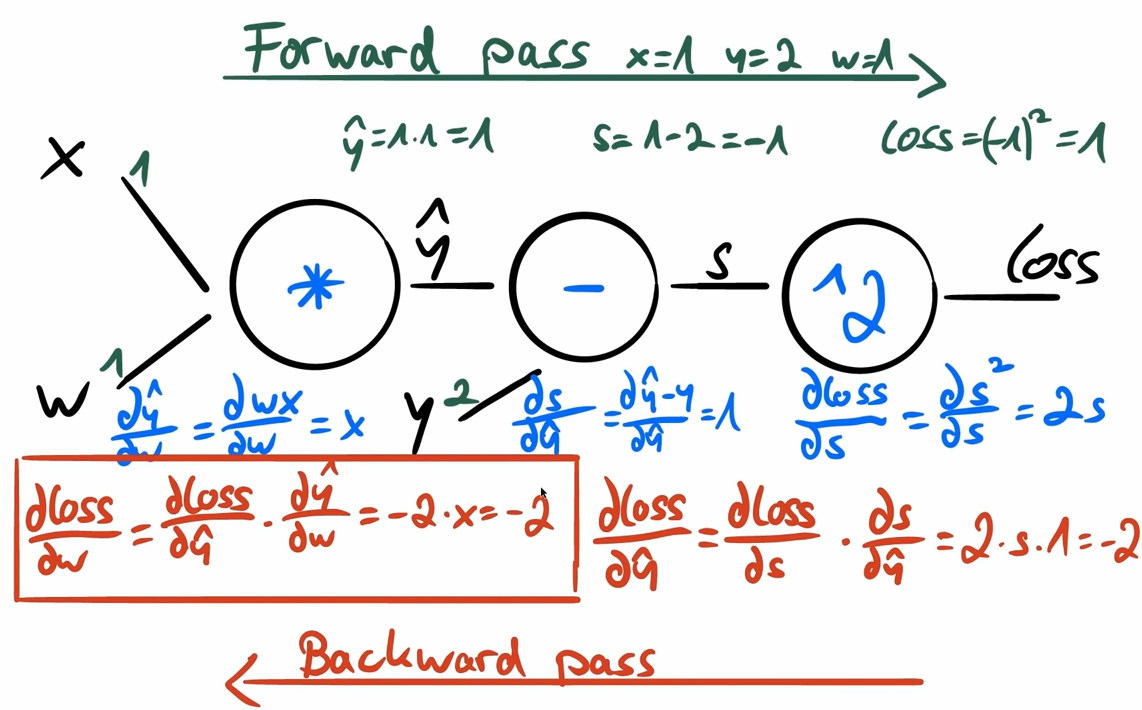

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)


# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y) ** 2

print(loss)

# backward pass
loss.backward()
print(w.grad)

## update weights
## next forward and backwards

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)
